<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/qf-workshop-2021/introduction-to-machine-learning/blob/main/1_notebooks/introduction-to-text-analysis.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Basic Text Analysis with Python

## Introduction

Text is one of the most widespread forms of sequence data. It can be understood as
either a sequence of characters or a sequence of words, but it’s most common to work
at the level of words. According to industry estimates, only 21% of the available data is present in a structured form. Data is being generated as we speak, as we tweet, as we send messages on WhatsApp and in various other activities. The majority of this data exists in the textual form, which is highly unstructured in nature. 

Despite having high dimension data, the information present in it is not directly accessible unless it is processed (read and understood) manually or analyzed by an automated system. In order to produce significant and actionable insights from text data, it is important to get acquainted with the basics of Text Analysis.

## What is Text Mining

Text Mining is the process of analysis of texts written in natural language and extract high-quality information from text. It involves looking for interesting patterns in the text or to extract data from the text to be inserted into a database. Text mining tasks include text categorization, text clustering, concept/entity extraction, production of granular taxonomies, sentiment analysis, document summarization, and entity relation modeling (i.e., learning relations between named entities). Developers have to prepare text using lexical analysis, POS (Parts-of-speech) tagging, stemming and other Natural Language Processing techniques to gain useful information from text.

## Package Required

**To start**, install the packages you need to run the code in this notebook.

In [1]:
# Python Regular Expression (RegEx)
import re
# Operating System Module
import os
# numpy library
import numpy as np
# pandas library
import pandas as pd
# matplotlib library
import matplotlib.pyplot as plt
# if uising a Jupyter notebook, include:
%matplotlib inline
# Natural Language Toolkit 
import nltk
# The BeautifulSoup Library for WEB Scraping
from bs4 import BeautifulSoup

import codecs
from sklearn import feature_extraction

## Definitions

### Corpus

A Corpus is defined as a **collection of text documents** for example a data set containing news is a corpus or the tweets containing Twitter data is a corpus. So corpus consists of documents, documents comprise paragraphs, paragraphs comprise sentences and sentences comprise further smaller units which are called Tokens.

### Using NLTK Corpus

What is NLTK? The [Natural Language Toolkit](https://www.nltk.org/), or more commonly NLTK, is a suite of libraries and programs for symbolic and statistical natural language processing (NLP) for English written in the Python programming language. It was developed by Steven Bird and Edward Loper in the Department of Computer and Information Science at the University of Pennsylvania.NLTK includes graphical demonstrations and sample data. It is accompanied by a book that explains the underlying concepts behind the language processing tasks supported by the toolkit, plus a text book available also on line [here](https://www.nltk.org/book/)

NLTK is intended to support research and teaching in NLP or closely related areas, including empirical linguistics, cognitive science, artificial intelligence, information retrieval, and machine learning.NLTK has been used successfully as a teaching tool, as an individual study tool, and as a platform for prototyping and building research systems. There are 32 universities in the US and 25 countries using NLTK in their courses. NLTK supports classification, tokenization, stemming, tagging, parsing, and semantic reasoning functionalities. 

The latest version is NLTK 3.3. It can be used by students, researchers, and industrialists. It is an Open Source and free library. It is available for Windows, Mac OS, and Linux. 

You can install nltk using pip installer if it is not installed in your Python installation. To test the installation:

- Open your Python IDE or the CLI interface (whichever you use normally)
- Type `import nltk` and press enter if no message of missing nltk is shown then nltk is installed on your computer.

After installation, nltk also provides test datasets to work within Natural Language Processing. You can download it by using the following commands in Python:

In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

You can use the NLTK Text Corpora which is a vast repository for a large body of text called as a Corpus which can be used while you are working with Natural Language Processing (NLP) with Python. There are many different types of corpora available that you can use with varying types of projects, for example, a selection of free electronic books, web and chat text and news documents on different genres.

In the online book site you can find everything you need to known to access the NLTK Corpus, in particular you can start from [Chapter 2 - Accessing Text Corpora and Lexical Resources](https://www.nltk.org/book/ch02.html).

Here is an example of how you can use a corpora

In [35]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

### Loading Your Own Corpus

If you have your own collection of text files that you would like to access using the above methods, you can easily load them with the help of NLTK's `PlaintextCorpusReader`. Check the location of your files on your file system; in the following example, we have taken this to be the directory `C:\Corpus\EBA`. Whatever the location, set this to be the value of corpus_root.

The second parameter of the PlaintextCorpusReader initializer can be a list of fileids, like ['a.txt', 'test/b.txt'], or a pattern that matches all fileids, like '[abc]/.*\.txt'

In [36]:
import nltk
from nltk.corpus import PlaintextCorpusReader

corpus_root = '.\corpus\EBA'
corpus_list = PlaintextCorpusReader(corpus_root, '.*', encoding='latin-1')
corpus_list.fileids()

['Final Guidelines on Accounting for Expected Credit Losses (EBA-GL-2017-06).txt',
 'Final Guidelines on the management of interest rate risk arising from non-trading activities.txt',
 'Final Report on Guidelines on LGD estimates under downturn conditions.txt',
 'Final Report on Guidelines on default definition (EBA-GL-2016-07).txt',
 'Final Report on Guidelines on uniform disclosure of IFRS9 transitional arrangements (EBA-GL-2018-01).txt',
 'Final report on updated GL Funding Plans (EBA 9.12.2019).txt',
 'Final report on updated GL Funding Plans_(EBA-GL-2019-05)_09122019.txt']

Let's pick out one of these text (for example the guideline on the interest rate), give it a short name, irrbb...

In [37]:
id = "Final Guidelines on the management of interest rate risk arising from non-trading activities.txt"
irrbb_w = corpus_list.words(id)

### Tokenization

Tokenization is a process of splitting a text object into smaller units which are also called tokens. Examples of tokens can be words, numbers, engrams, or even symbols. Single words are called unigrams, two words bi-grams, and three words tri-grams.

The most commonly used tokenization process is White-space Tokenization.

In [38]:
sentence = "Clear and effective communication is very important to us. Our monetary policy becomes more \
            effective when our decisions are better understood. The media play an important role in this \
            process and help keep us accountable to the European public."
tokens = sentence.split()
print(tokens)

['Clear', 'and', 'effective', 'communication', 'is', 'very', 'important', 'to', 'us.', 'Our', 'monetary', 'policy', 'becomes', 'more', 'effective', 'when', 'our', 'decisions', 'are', 'better', 'understood.', 'The', 'media', 'play', 'an', 'important', 'role', 'in', 'this', 'process', 'and', 'help', 'keep', 'us', 'accountable', 'to', 'the', 'European', 'public.']


When dealing with a new dataset it's often helpful to extract the most common words to get an idea of what the data is about. You usually want to extract the most common unigrams first, but it can also be useful to extract n-grams with larger n to identify patterns. NLTK has in-built bigrams, trigrams and ngrams functions.

In [39]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams, bigrams, trigrams

sen = "Clear and effective communication is very important to us. Our monetary policy becomes more \
            effective when our decisions are better understood. The media play an important role in this \
            process and help keep us accountable to the European public."
nltk_tokens = word_tokenize(sen) #using tokenize from NLKT and not split() because split() does not take into account punctuation

#splitting sentence into bigrams and trigrams
print(list(bigrams(nltk_tokens)))
print(list(trigrams(nltk_tokens)))

[('Clear', 'and'), ('and', 'effective'), ('effective', 'communication'), ('communication', 'is'), ('is', 'very'), ('very', 'important'), ('important', 'to'), ('to', 'us'), ('us', '.'), ('.', 'Our'), ('Our', 'monetary'), ('monetary', 'policy'), ('policy', 'becomes'), ('becomes', 'more'), ('more', 'effective'), ('effective', 'when'), ('when', 'our'), ('our', 'decisions'), ('decisions', 'are'), ('are', 'better'), ('better', 'understood'), ('understood', '.'), ('.', 'The'), ('The', 'media'), ('media', 'play'), ('play', 'an'), ('an', 'important'), ('important', 'role'), ('role', 'in'), ('in', 'this'), ('this', 'process'), ('process', 'and'), ('and', 'help'), ('help', 'keep'), ('keep', 'us'), ('us', 'accountable'), ('accountable', 'to'), ('to', 'the'), ('the', 'European'), ('European', 'public'), ('public', '.')]
[('Clear', 'and', 'effective'), ('and', 'effective', 'communication'), ('effective', 'communication', 'is'), ('communication', 'is', 'very'), ('is', 'very', 'important'), ('very', '

The sents() function divides the text up into sentencese, where each sentence is a list of words

In [8]:
irrbb_s = corpus_list.sents(id)
irrbb_s

[['GUIDELINES', 'ON', 'THE', 'MANAGEMENT', 'OF', 'INTEREST', 'RATE', 'RISK'], ['ARISING', 'FROM', 'NON', '-', 'TRADING', 'BOOK', 'ACTIVITIES'], ...]

## Processing Raw Text

The most important source of texts is undoubtedly the Web. It's convenient to have existing text collections to explore, such as the corpora we 'll see in the next paragraph. However, you probably have your own text sources in mind, and need to learn how to access them.

### Processing HTML Files

The first type of structured text document you’ll look at is HTML—a markup
language commonly used on the web for human-readable representation of
information. An HTML document consists of text and predefined tags (enclosed
in angle brackets <>) that control the presentation and interpretation of the
text. The tags may have attributes.

Reference: [this](https://towardsdatascience.com/choose-the-best-python-web-scraping-library-for-your-application-91a68bc81c4f)

### Urllib

Urllib is a Python library that allows the developer to open and parse information from HTTP or FTP protocols. Urllib offers some functionality to deal with and open URLs, namely:
- urllib.request: opens and reads URLs.
- urllib.error: catches the exceptions raised by urllib.request.
- urllib.parse: parses URLs.
- urllib.robotparser: parses robots.txt files.

You don’t need to install Urllib since it is a part of the built-in Python library.

In [40]:
from urllib import request

def freq_words_2(url, n):
    html = request.urlopen(url).read().decode('utf8')
    text = BeautifulSoup(html, 'html.parser').get_text()
    fd = nltk.FreqDist(word.lower() for word in nltk.word_tokenize(text))
    return [word for (word, _) in fd.most_common(n)]

In [41]:
page = "https://static.nytimes.com/email-content/CB_sample.html"
freq_words_2(page, 5)

[',', 'the', 'a', 'to', 'of']

In [42]:
from nltk.corpus import stopwords 

def freq_words_3(url, n):
    stop_words = set(stopwords.words('english')) 
    html = request.urlopen(url).read().decode('utf8')
    text = BeautifulSoup(html, 'html.parser').get_text()
    fd = nltk.FreqDist(word.lower() for word in nltk.word_tokenize(text) if not word in stop_words and word.isalpha())
    return [word for (word, _) in fd.most_common(n)]

In [43]:
freq_words_3(page, 5)

['people', 'may', 'the', 'virus', 'vaccine']

### BeautifulSoup

[BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) is a Python library that is used to extract information from XML and HTML files. Beautiful Soup is considered a parser library. Parsers help the programmer obtain data from an HTML file. One of Beautiful Soup’s strengths is its ability to detect page encoding, and hence get more accurate information from the HTML text. Another advantage of Beautiful Soup is its simplicity and ease.

You can construct a BeautifulSoup object from a markup
string, a markup file, or a URL of a markup document on the web:

In [44]:
from bs4 import BeautifulSoup

# Construct soup from a string
soup1 = BeautifulSoup("<HTML><HEAD>«headers»</HEAD>«body»</HTML>")
print(soup1.text)

«headers»«body»


In [46]:
# Construct soup from a local file
soup2 = BeautifulSoup(open("./corpus/web/Democrats Poised For Senate Control As Counting Continues In Georgia_NPR.html"))
print(soup2.title)

<title>Democrats Poised For Senate Control As Counting Continues In Georgia : NPR</title>


In [47]:
print(soup2.title.string)

Democrats Poised For Senate Control As Counting Continues In Georgia : NPR


One common task is extracting all the URLs found within a page’s <a> tags:

In [48]:
for link in soup2.find_all('a'):
    print(link.get('href'))

https://www.npr.org/2021/01/06/953712195/democrats-move-closer-to-senate-control-as-counting-continues-in-georgia?t=1609935922923#mainContent
https://help.npr.org/contact/s/article?name=what-are-the-keyboard-shortcuts-for-using-the-npr-org-audio-player
https://www.npr.org/
https://www.npr.org/2021/01/06/953712195/democrats-move-closer-to-senate-control-as-counting-continues-in-georgia?t=1609935922923#
https://shop.npr.org/
https://www.npr.org/donations/support
https://www.npr.org/
https://www.npr.org/sections/news/
https://www.npr.org/sections/national/
https://www.npr.org/sections/world/
https://www.npr.org/sections/politics/
https://www.npr.org/sections/business/
https://www.npr.org/sections/health/
https://www.npr.org/sections/science/
https://www.npr.org/sections/technology/
https://www.npr.org/sections/codeswitch/
https://www.npr.org/sections/arts/
https://www.npr.org/books/
https://www.npr.org/sections/movies/
https://www.npr.org/sections/television/
https://www.npr.org/sections/

**When to use BeautifulSoup?**
If you’re just starting with webs scarping or with Python, Beautiful Soup is the best choice to go. Moreover, if the documents you’ll be scraping are not structured, Beautiful Soup will be the perfect choice to use.
If you’re building a big project, Beautiful Soup will not be the wise option to take. Beautiful Soup projects are not flexible and are difficult to maintain as the project size increases.

In [30]:
import requests
from bs4 import BeautifulSoup
 
base_url = 'http://www.nytimes.com'
r = requests.get(base_url)
soup = BeautifulSoup(r.text)
 
for story_heading in soup.find_all(class_="story-wrapper"): 
    #print(story_heading)
    if story_heading.a: 
        print(story_heading.a.text.replace("\n", " ").strip())
    else: 
        print(story_heading.contents[0].strip())

Biden Orders Inquiry Into Origins of Coronavirus
Immunity to the Coronavirus May Persist for Years, Scientists Find
A former top aide for Prime Minister Boris Johnson described chaos in Britain’s virus response. Catch up on Covid-19 news.
With vaccinations declining nationally, states are offering big incentives, including $1 million prizes.
Tracking the Coronavirus ›
8 Killed in Shooting at San Jose Rail Yard
Here’s a partial list of shootings in the United States with multiple victims in 2021.
A Culture of Fear at the Firm That Manages Bill Gates’s Fortune
At least four employees at the firm, Cascade Investment, complained to Mr. Gates about Michael Larson, his longtime money manager.
U.S. Faces Outbreak of Anti-Semitic Threats and Violence
In the wake of clashes in Israel and Gaza, synagogues have been vandalized and Jews have been threatened and attacked.
Eric Carle, Author of ‘The Very Hungry Caterpillar,’ Dies at 91
Climate Activists Defeat Exxon in Push for Clean Energy
Despite 

In [31]:
base_url = 'https://www.theguardian.com/international'
r    = requests.get(base_url)
soup = BeautifulSoup(r.text)

for story_heading in soup.find_all(class_="fc-item__standfirst"): 
    #print(story_heading)
    if story_heading.a: 
        print(story_heading.a.text.replace("\n", " ").strip())
    else: 
        print(story_heading.contents[0].strip())

President wants to explore unlikely possibility that virus origins trace to Chinese lab
Michael Larson, who runs Cascade Investments, subject of claims including racist and sexist remarks
Health secretary will appear in the Commons and host a press conference a day after incendiary claims from PM’s former aide
The four-times grand slam champion has said she will not take press questions at the upcoming Roland Garros event
AstraZeneca and Johnson&Johnson jabs have caused rare blood clots but scientists say they can be redesigned to avoid problem
Follow the latest updates

The magic between the six Friends as they return to the apartment is undeniably cheering. But no one needs to see James Corden – or Justin Bieber dressed as a potato
If the grand jury goes against him, Trump would be the first former US president charged with a crime
Today’s punch-up obscured how many of the failures that left the UK so fatally exposed to the pandemic still remain, says Guardian columnist Aditya Chakra

## Regular Expressions

A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern. RegEx can be used to check if a string contains the specified search pattern. Python has a built-in package called re, which can be used to work with Regular Expressions.

### Why we need Regular Expression

Imagine you have a string object s. Now suppose you need to write Python code to find out whether s contains the substring '123'. There are at least a couple ways to do this. You could use the in operator:

In [49]:
s = 'foo123bar'
'123' in s

True

If you want to know not only whether '123' exists in s but also where it exists, then you can use .find() or .index(). Each of these returns the character position within s where the substring resides:

In [50]:
s.find('123')

3

In [51]:
s.index('123')

3

In these examples, the matching is done by a straightforward character-by-character comparison. That will get the job done in many cases. But sometimes, the problem is more complicated than that.

For example, rather than searching for a fixed substring like '123', suppose you wanted to determine whether a string contains any three consecutive decimal digit characters, as in the strings 'foo123bar', 'foo456bar', '234baz', and 'qux678'.

Strict character comparisons won’t cut it here. This is where regexes in Python come to the rescue.

### The Re Module

Regex functionality in Python resides in a module named re. 

For now, you’ll focus predominantly on one function, `re.search()`.

`re.search(\<regex>, \<string>)`

This function search looking for the first location where the pattern \<regex> matches. If a match is found, then `re.search()` returns a match object. Otherwise, it returns `None`.

In [ ]:
import re

re.search('123', s)

For the moment, the important point is that re.search() did in fact return a match object rather than None. That tells you that it found a match. In other words, the specified \<regex> pattern 123 is present in s. The interpreter displays the match object as \<_sre.SRE_Match object; span=(3, 6), match='123'>. 

This contains some useful information:

- span=(3, 6) indicates the portion of <string> in which the match was found. In this example, the match starts at character position 3 and extends up to but not including position 6.
    
- match='123' indicates which characters from \<string> matched.    

### Python Regex Metacharacters

The real power of regex matching in Python emerges when \<regex> contains special characters called metacharacters. These have a unique meaning to the regex matching engine and vastly enhance the capability of the search. Consider again the problem of how to determine whether a string contains any three consecutive decimal digit characters.

In a regex, a set of characters specified in square brackets ([]) makes up a character class. This metacharacter sequence matches any single character that is in the class, as demonstrated in the following example:

In [52]:
#
# [0-9] matches any single decimal digit character—any character between '0' and '9', inclusive. 
# The full expression [0-9][0-9][0-9] matches any sequence of three decimal digit characters.
# On the other hand, a string that doesn’t contain three consecutive digits won’t match!
#
pattern = '[0-9][0-9][0-9]'

mylist = ['gdash5622hjj', 'dafasfas', '654fdhaskjf', 'ashjdfuqo','67yahd', '9jhdksaf', '42hddhdh67','udyakh']
for l in mylist:
    if re.search(pattern, l):
        print(l)

gdash5622hjj
654fdhaskjf


With regexes in Python, you can identify patterns in a string that you wouldn’t be able to find with the in operator or with string methods.

Take a look at another regex metacharacter. The dot (.) metacharacter matches any character except a newline, so it functions like a wildcard:

In [53]:
pattern = 'a.h'
for l in mylist:
    if re.search(pattern, l):
        print(l)

gdash5622hjj
ashjdfuqo
udyakh


Here, you’re essentially asking, *“Does s contain a 'a', then any character (except a newline), then a 'h'?”*.

A character class metacharacter sequence will match any single character contained in the class. You can enumerate the characters individually like this:

In [ ]:
pattern = 'Nr[0-9]'

mylist = ['gdas askjd Nr59 dsafh', 'dafasfas', 'Nr47 adfd jads', 'dkajòqwo idf Nr 78','67yahd', '9jhdksaf', '42hddhdh67','udyakh']
for l in mylist:
    if re.search(pattern, l):
        print(l)

You can complement a character class by specifying ^ as the first character, in which case it matches any character that isn’t in the set. In the following example, [^0-9] matches any character that isn’t a digit:

In [54]:
pattern = '[^0-9].'

words = 'All in all, the EU economy is forecast to grow by 4.6% in 2021 and \
         to strengthen to around 5.3% in 2022, 4.2% and 3.2% respectively, in the euro area.'

#words = words.replace('.','').replace(',','')

mylist = words.split()
for l in mylist:
    if re.search(pattern, l):
        print(l, end= ' ')

All in all, the EU economy is forecast to grow by 4.6% in and to strengthen to around 5.3% in 4.2% and 3.2% respectively, in the euro area. 

In [55]:
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]

In [56]:
[w for w in wordlist if re.search('^zu', w)]

['zuccarino',
 'zucchetto',
 'zucchini',
 'zudda',
 'zugtierlast',
 'zugtierlaster',
 'zuisin',
 'zumatic',
 'zumbooruk',
 'zunyite',
 'zupanate',
 'zuurveldt',
 'zuza']

Let's find words ending with **zz** using the regular expressio

In [57]:
[w for w in wordlist if re.search('zz$', w)]

['abuzz',
 'bejazz',
 'bizz',
 'blizz',
 'brizz',
 'bruzz',
 'buzz',
 'fizz',
 'frizz',
 'fuzz',
 'gizz',
 'hizz',
 'humbuzz',
 'huzz',
 'jazz',
 'muzz',
 'outbuzz',
 'outjazz',
 'razz',
 'sizz',
 'unfrizz',
 'zizz']

In [58]:
[w for w in wordlist if re.search('^app.*ed$', w)]

['appearanced',
 'appellatived',
 'appendaged',
 'appendiculated',
 'applied',
 'appressed']

In [ ]:
chat_words = sorted(set(w for w in nltk.corpus.nps_chat.words()))
[w for w in chat_words if re.search('^[ha]+$', w)]

It should be clear that + simply means "one or more instances of the preceding item", which could be an individual character like m, a set like [fed] or a range like [d-f]. Now let's replace + with *, which means "zero or more instances of the preceding item".

## Preprocessing

In this section I want to go over some important NLP concepts and show code examples on how to apply them on text data.

Once you are sure that all documents loaded properly, go on to **preprocess your texts**.
This step allows you to _**remove numbers, capitalization, common words, punctuation, and otherwise prepare your texts for analysis**_. Data cleansing, though tedious, is perhaps the most important step in text analysis.   As we will see, dirty data can play havoc with the results.  Furthermore, as we will also see, data cleaning is invariably an iterative process as there are always problems that are overlooked the first time around.

**Removing punctuation**:
Your computer cannot actually read. Punctuation and other special characters only look like more words to your computer and R. Use the following to methods to remove them from your text.

In [ ]:
sentence = "Clear and effective communication is very important to us. Our monetary policy becomes \
            more effective when our decisions are better understood. The media play an important \
            role in this process and help keep us accountable to the European public."
# remove all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]
print(words)

**Converting to lowercase**:
As before, we want a word to appear exactly the same every time it appears. Since many languages **are** case sensitive, “Text” is not equal to “text” – and hence the rationale for converting to a standard case. We therefore change everything to lowercase. nspect the corpus again to ensure that the offenders have been eliminated. This is also a good time to check for any other special symbols that may need to be removed manually.

In [59]:
# all lowercase
words = [word.lower() for word in words]
print(words)

['a', 'l', 'l', ' ', 'i', 'n', ' ', 'a', 'l', 'l', ',', ' ', 't', 'h', 'e', ' ', 'e', 'u', ' ', 'e', 'c', 'o', 'n', 'o', 'm', 'y', ' ', 'i', 's', ' ', 'f', 'o', 'r', 'e', 'c', 'a', 's', 't', ' ', 't', 'o', ' ', 'g', 'r', 'o', 'w', ' ', 'b', 'y', ' ', '4', '.', '6', '%', ' ', 'i', 'n', ' ', '2', '0', '2', '1', ' ', 'a', 'n', 'd', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 't', 'o', ' ', 's', 't', 'r', 'e', 'n', 'g', 't', 'h', 'e', 'n', ' ', 't', 'o', ' ', 'a', 'r', 'o', 'u', 'n', 'd', ' ', '5', '.', '3', '%', ' ', 'i', 'n', ' ', '2', '0', '2', '2', ',', ' ', '4', '.', '2', '%', ' ', 'a', 'n', 'd', ' ', '3', '.', '2', '%', ' ', 'r', 'e', 's', 'p', 'e', 'c', 't', 'i', 'v', 'e', 'l', 'y', ',', ' ', 'i', 'n', ' ', 't', 'h', 'e', ' ', 'e', 'u', 'r', 'o', ' ', 'a', 'r', 'e', 'a', '.']


**Removing numbers**: Text analysts are typically not interested in numbers since these do not usually contribute to the meaning of the text. However, this may not always be so. For example, it is definitely not the case if one is interested in getting a count of the number of times a particular year appears in a corpus. 

In [60]:
# remove numbers
words = [w for w in words if not w.isdigit()]

**Removing “Stop Words” (common words)** 

In every text, there are a lot of common, and uninteresting words thate we generically call Stop WOrds. Stop words are words that may not carry any valuable information, like articles (“the”), conjunctions (“and”), or propositions (“with”). Why would you want to remove them? Because finding out that “the” and “a” are the most common words in your dataset doesn’t tell you much about the data. Such words are frequent by their nature, and will confound your analysis if they remain in the text. 

NLP Python libraries like NLTK usually come with an in-built stopword list which you can easily import.

In [61]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example_sent = "This is a sample sentence, showing off the stop words filtration."
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(example_sent)

filtered_sentence = [w for w in word_tokens if not w in stop_words]
print(filtered_sentence)

['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


Note, that in some cases stop words matter. For example, in identifying negative reviews or recommendations. People will use stop words like “no” and “not” in negative reviews: “I will not buy this product again. I saw no benefits in using it”. 

**Removing particular words**:

The NLTK stopword list, however, only has around 200 stopwords. The stopword list which one can commonly use for text analysis may contains almost 600 words. So if you find that a particular word or two appear in the output, but are not of value to your particular analysis, you can remove them, specifically, from the text.

## Lemmatisation and Stemming 

Stemming and Lemmatization are Text Normalization (or sometimes called Word Normalization) techniques in the field of Natural Language Processing that are used to prepare text, words, and documents for further processing. Stemming and Lemmatization have been studied, and algorithms have been developed in Computer Science since the 1960's.

Languages we speak and write are made up of several words often derived from one another. When a language contains words that are derived from another word as their use in the speech changes is called **Inflected Language**. [Inflection](https://en.wikipedia.org/wiki/Inflection) is the modification of a word to express different grammatical categories such as tense, case, voice, aspect, person, number, gender, and mood. An inflection expresses one or more grammatical categories with a prefix, suffix or infix, or another internal modification such as a vowel change.

Typically a large corpus will contain many words that have a common root – for example: offer, offered and offering. Lemmatisation and stemming both refer to a process of reducing a word to its root. The difference is that stem might not be an actual word whereas, a lemma is an actual word. It’s a handy tool if you want to avoid treating different forms of the same word as different words. Let's consider the following example:

- Lemmatising: considered, considering, consider → “consider”
- Stemming: considered, considering, consider → “consid”

Stemming and Lemmatization are widely used in tagging systems, indexing, SEOs, Web search results, and information retrieval. For example, searching for fish on Google will also result in fishes, fishing as fish is the stem of both words.

NLTK comes with many different in-built lemmatisers and stemmers, so just plug and play.

### NLTK Stemming

In [62]:
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

word = "considering"

stemmed_word =  stemmer.stem(word)
lemmatised_word = lemmatizer.lemmatize(word)

print(stemmed_word)
print(lemmatised_word)

consid
considering


We can use any of the text of nltk corpora to make some test. For example:

In [63]:
text_file=nltk.corpus.gutenberg.words('melville-moby_dick.txt')
my_lines_list=[]
for line in text_file:
    my_lines_list.append(line)
#my_lines_list

In [ ]:
stemmer=PorterStemmer()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(stemmer.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [ ]:
stem_file=open("stemming_example.txt",mode="a+", encoding="utf-8")

for line in my_lines_list:
    stem_sentence=stemSentence(line)
    stem_file.write(stem_sentence)
    
stem_file.close()    

Python nltk provides not only two English stemmers: PorterStemmer and LancasterStemmer but also a lot of non-English stemmers as part of SnowballStemmers, ISRIStemmer, RSLPSStemmer. Python NLTK included SnowballStemmers as a language to create to create non-English stemmers. One can program one's own language stemmer using snowball. Currently, it supports the following languages:
- Danish
- Dutch
- English
- French
- German
- Hungarian
- Italian
- Norwegian
- Porter
- Portuguese
- Romanian
- Russian
- Spanish
- Swedish

ISRIStemmer is an Arabic stemmer and RSLPStemmer is stemmer for the Portuguese Language.

### NLTK Lemmatization

As we have already said, lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.

For example, runs, running, ran are all forms of the word run, therefore run is the lemma of all these words. Because lemmatization returns an actual word of the language, it is used where it is necessary to get valid words.

Python NLTK provides WordNet Lemmatizer that uses the WordNet Database to lookup lemmas of words. WordNet is a lexical database for the English language, which was created by Princeton, and is part of the NLTK corpus.

In [64]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."
punctuations="?:!.,;"
sentence_words = nltk.word_tokenize(sentence)
for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)

sentence_words
print("{0:20}{1:20}".format("Word","Lemma"))
for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word)))

Word                Lemma               
He                  He                  
was                 wa                  
running             running             
and                 and                 
eating              eating              
at                  at                  
same                same                
time                time                
He                  He                  
has                 ha                  
bad                 bad                 
habit               habit               
of                  of                  
swimming            swimming            
after               after               
playing             playing             
long                long                
hours               hour                
in                  in                  
the                 the                 
Sun                 Sun                 


In the above output, you must be wondering that no actual root form has been given for any word, this is because they are given without context. You need to provide the context in which you want to lemmatize that is the parts-of-speech (POS). This is done by giving the value for pos parameter in `wordnet_lemmatizer.lemmatize`

In [65]:
for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word, pos="v")))

He                  He                  
was                 be                  
running             run                 
and                 and                 
eating              eat                 
at                  at                  
same                same                
time                time                
He                  He                  
has                 have                
bad                 bad                 
habit               habit               
of                  of                  
swimming            swim                
after               after               
playing             play                
long                long                
hours               hours               
in                  in                  
the                 the                 
Sun                 Sun                 


### Stemming or lemmatization?

After going through this section, you may be asking yourself when should I use Stemming and when should I use Lemmatization? We have seen the following points:

Stemming and Lemmatization both generate the root form of the inflected words. The difference is that stem might not be an actual word whereas, lemma is an actual language word.

Stemming follows an algorithm with steps to perform on the words which makes it faster. Whereas, in lemmatization, you used WordNet corpus and a corpus for stop words as well to produce lemma which makes it slower than stemming. You also had to define a parts-of-speech to obtain the correct lemma.

So when to use what! The above points show that if speed is focused then stemming should be used since lemmatizers scan a corpus which consumed time and processing. It depends on the application you are working on that decides if stemmers should be used or lemmatizers. If you are building a language application in which language is important you should use lemmatization as it uses a corpus to match root forms.

## Measuring Words Frequency

Computers can’t directly understand text like humans can. Humans automatically break down sentences into units of meaning.
In this case, we have to first explicitly show the computer how to do this. As we have seen this is the process of tokenization. After tokenization, we can convert the tokens into a matrix (bag of words model). Once we have a matrix, we can a machine learning algorithm to train a model and predict scores.

### The document term matrix

The first step in the process is the creation of the document term matrix  (DTM)– a matrix that lists all occurrences of words in the corpus, by document. In the DTM, the documents are represented by rows and the terms (or words) by columns.  If a word occurs in a particular document, then the matrix entry for corresponding to that row and column is 1, else it is 0 (multiple occurrences within a document are recorded – that is, if a word occurs twice in a document, it is recorded as “2” in the relevant matrix entry).

![image.png](./img/tf-idf-0.png)

A simple example might serve to explain the structure of the TDM more clearly. Assume we have a simple corpus consisting of two documents, Doc1 and Doc2, with the following content:

Doc1 = "I like databases"
Doc2 = "I dislike databases",

then the document-term matrix would be:

![image.png](./img/tf-idf-1.png)

Clearly there is nothing special about rows and columns – we could just as easily transpose them. If we did so, we’d get a term document matrix (TDM) in which the terms are rows and documents columns. One can work with either a DTM or TDM. Using the raw count of a term in a document, i.e. the number of times that term t occurs in document d, is the simplest choice to measure the term frequency $tf(t,d)$. If we denote the raw count by $f_{t,d}$, then the simplest $tf$ scheme is $tf(t,d) = f_{t,d}$. Other possibilities include

- Boolean "frequencies": $tf(t,d) = 1$ if $t$ occurs in $d$ and $0$ otherwise;
- Term frequency adjusted for document length : $f_{t,d} \big/ \text{(number of words in d)}$;
- Logarithmically scaled frequency: $tf(t,d) = \log (1 + f_{t,d})$;
- Augmented frequency, to prevent a bias towards longer documents, e.g. raw frequency divided by the raw frequency of the most occurring term in the document.

This simple approach is an example of the so called "bag of words models". The bag of words is a foundational block for a lot of more advanced techniques. What we are doing is extracting potentially relevant information in a manner the computer can utilize (ie numbers)

### Term frequency–Inverse document frequency

The **inverse document frequency** is a measure of how much information the word provides, that is, whether the term is common or rare across all documents. It is the logarithmically scaled inverse fraction of the documents that contain the word, obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient:

\begin{equation}
idf(t, D) = \log \frac{N}{\vert\{d \in D : t \in d  \}\vert}
\end{equation}


where $N$ is the total number of documents in the corpus and $\vert\{d \in D : t \in d  \}\vert$ is the number of documents in which the term $t$ appears. Now we can compute the so called *Term Frequency-Inverse Document Frequency* (tf-idf). The *tf-idf* is calculated as:

\begin{equation}
\text{tfidf}(t, d, D) = \text{tf}(t, d) \times \text{idf}(t,D)
\end{equation}

A high weight in tf–idf is reached by a high term frequency (in the given document) and a low document frequency of the term in the whole collection of documents; the weights hence tend to filter out common terms. Since the ratio inside the idf's log function is always greater than or equal to 1, the value of idf (and tf–idf) is greater than or equal to 0. As a term appears in more documents, the ratio inside the logarithm approaches 1, bringing the idf and tf–idf closer to 0.

## Mining the Corpus

In [ ]:
myDoc = corpus_list.words(corpus_list.fileids()[1])
# all lowercase
words = [word.lower() for word in myDoc if len(word) > 1]

# remove all tokens that are not alphabetic
words = [word for word in words if word.isalpha()]

# filter out stop words
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]

# remove numbers
words = [w for w in words if not w.isdigit()]

In [ ]:
from nltk.probability import FreqDist
f1 = FreqDist(words)
f1

In [ ]:
FreqDist(words).plot(20, cumulative=False)

In [ ]:
import wordcloud
#nice library to produce wordclouds
from wordcloud import WordCloud

In [ ]:
myText = ' '.join(words)

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(myText) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# A Simple Example of Document Clustering

In the next example we will use a large, freely available database to present a simple clustering example.

## Import Data ##

For the purposes of this walkthrough, imagine that you have 2 primary lists:

- 'titles': the titles of the films in their rank order
- 'synopses': the synopses of the films matched to the 'titles' order

Of primary importance is the 'synopses' list; 'titles' is mostly used for labeling purposes.

In [67]:
path = './corpus/'

In [68]:
#import three lists: titles, links and wikipedia synopses
#
# title-list as the name suggests contains a simple list of the 
# 100 top films of all time according to IMDB
#
titles = open(path + 'title_list.txt').read().split('\n')
#ensures that only the first 100 are read in
titles = titles[:100]

synopses_wiki = open(path + 'synopses_list_wiki.txt', encoding="utf8").read().split('\n BREAKS HERE')
synopses_wiki = synopses_wiki[:100]

synopses_clean_wiki = []
for text in synopses_wiki:
    text = BeautifulSoup(text, 'html.parser').getText()
    #strips html formatting and converts to unicode
    synopses_clean_wiki.append(text)
synopses_wiki = synopses_clean_wiki

In [70]:
print(titles[0:10])

['The Godfather', 'The Shawshank Redemption', "Schindler's List", 'Raging Bull', 'Casablanca', "One Flew Over the Cuckoo's Nest", 'Gone with the Wind', 'Citizen Kane', 'The Wizard of Oz', 'Titanic']


In [71]:
print(synopses_wiki[0][:200]) #first 200 characters in first synopses (for 'The Godfather')

 Plot  [edit]  [  [  edit  edit  ]  ]  
  On the day of his only daughter's wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito's youngest son,


The list 'links' contains hyperlink to a specific film in imdb database. For example if you want to know more about *Chinatown* click on [imdb.com/title/tt0071315/](https://www.imdb.com/title/tt0071315/).

In [72]:
links = open(path + 'link_list_imdb.txt').read().split('\n')
links = links[:100]

In [73]:
synopses_imdb = open(path + 'synopses_list_imdb.txt').read().split('\n BREAKS HERE')
synopses_imdb = synopses_imdb[:100]

synopses_clean_imdb = []

for text in synopses_imdb:
    text = BeautifulSoup(text, 'html.parser').getText()
    #strips html formatting and converts to unicode
    synopses_clean_imdb.append(text)

synopses_imdb = synopses_clean_imdb

In [74]:
genres = open(path + 'genres_list.txt').read().split('\n')
genres = genres[:100]

In [75]:
print(str(len(titles)) + ' titles')
print(str(len(links)) + ' links')
print(str(len(synopses_wiki)) + ' synopses wiki')
print(str(len(synopses_imdb)) + ' synopses imdb')
print(str(len(genres)) + ' genres')

100 titles
100 links
100 synopses wiki
100 synopses imdb
100 genres


We merge synopses from wikipedia and imdb in order to have more words to work with

In [76]:
synopses = []

for i in range(len(synopses_wiki)):
    item = synopses_wiki[i] + synopses_imdb[i]
    synopses.append(item)

In [77]:
# generates index for each item in the corpora (in this case it's 
# just rank) and I'll use this for scoring later

ranks = []

for i in range(0,len(titles)):
    ranks.append(i)
    

## Tokenization

Below we define two functions:

<ul>
<li> *tokenize_and_stem*: tokenizes (splits the synopsis into a list of its respective words (or tokens) and also stems each token <li> *tokenize_only*: tokenizes the synopsis only
</ul>

I use both these functions to create a dictionary which becomes important in case I want to use stems for an algorithm, but later convert stems back to their full words for presentation purposes. 

In [78]:
# here I define a tokenizer and stemmer which returns the set of 
# stems in the text that it is passed
stopwords = stopwords.words('english')
stemmer = SnowballStemmer("english")

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that 
    # punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    
    #exclude stopwords from stemmed words
    stems = [stemmer.stem(t) for t in filtered_tokens if word not in stopwords]

    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that 
    # punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

Below we use stemming/tokenizing and tokenizing functions to iterate over the list of synopses to create two vocabularies: one stemmed and one only tokenized. 

In [79]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in synopses:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

Using these two lists, we create a pandas DataFrame with the stemmed vocabulary as the index and the tokenized words as the column. The benefit of this is it provides an efficient way to look up a stem and return a full token. The downside here is that stems to tokens are one to many: the stem 'run' could be associated with 'ran', 'runs', 'running', etc. For our purposes in this very simple example this is not a problem.

In [80]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)

## From Words to Vectors

Processing natural language text and extract useful information from the given word, a sentence using machine learning and deep learning techniques requires the string/text needs to be converted into a set of real numbers (a vector). The process of converting words into numbers are called Vectorization. After the words are converted as vectors, we need to use some techniques such as Euclidean distance, Cosine Similarity to identify similar words. 

## Document Similarity

Text Similarity has to determine how the two text documents close to each other in terms of their context or meaning. There are various text similarity metric exist such as Cosine similarity, Euclidean distance and Jaccard Similarity. All these metrics have their own specification to measure the similarity between two queries.

Count the common words or Euclidean distance is the general approach used to match similar documents which are based on counting the number of common words between the documents.

### Cosine Similarity

Cosine similarity is one of the metric to measure the text-similarity between two documents irrespective of their size in Natural language Processing. A word is represented into a vector form. The text documents are represented in n-dimensional vector space.

Mathematically, Cosine similarity metric measures the cosine of the angle between two n-dimensional vectors projected in a multi-dimensional space. The Cosine similarity of two documents will range from 0 to 1. If the Cosine similarity score is 1, it means two vectors have the same orientation. The value closer to 0 indicates that the two documents have less similarity.

The mathematical equation of Cosine similarity between two non-zero vectors is:

\begin{equation}
\text{similarity} = \cos(\theta) = \frac{\mathbf{A} \cdot \mathbf{B}}{\left\Vert\mathbf{A}\right\Vert \,\left\Vert\mathbf{B}\right\Vert} = \frac{\sum\limits_{i=1}^n A_iB_i}{\sum\limits_{i=1}^n A_i^2 \sum\limits_{i=1}^n B_i^2}
\end{equation}

Let’s see the example of how to calculate the cosine similarity between two text document. The common way to compute the Cosine similarity is to first we need to count the word occurrence in each document. To count the word occurrence in each document, we can use **CountVectorizer** or **TfidfVectorizer** functions that are provided by Scikit-Learn library.

doc_1 = "Data is the oil of the digital economy" 
doc_2 = "Data is a new oil" 

and consider the following frequency matrix

<!--
<img src='./img/tf-idf-2.png'>
-->
![image.png](./img/tf-idf-2.png)

We can write

In [81]:
doc_1 = "Data is the oil of the digital economy" 
doc_2 = "Data is a new oil" 

In [82]:
data = [doc_1, doc_2]

In [84]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
vector_matrix = count_vectorizer.fit_transform(data)

Here, is the unique tokens list found in the data.

In [85]:
tokens = count_vectorizer.get_feature_names()
tokens

['data', 'digital', 'economy', 'is', 'new', 'of', 'oil', 'the']

In [86]:
vector_matrix.toarray()

array([[1, 1, 1, 1, 0, 1, 1, 2],
       [1, 0, 0, 1, 1, 0, 1, 0]], dtype=int64)

In [87]:
def create_dataframe(matrix, tokens):

    doc_names = [f'doc_{i+1}' for i, _ in enumerate(matrix)]
    df = pd.DataFrame(data=matrix, index=doc_names, columns=tokens)
    return(df)

create_dataframe(vector_matrix.toarray(),tokens)

,data,digital,economy,is,new,of,oil,the
doc_1,1,1,1,1,0,1,1,2
doc_2,1,0,0,1,1,0,1,0


In [88]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['doc_1','doc_2'])

,doc_1,doc_2
doc_1,1.000000,0.474342
doc_2,0.474342,1.000000


Let’s check the cosine similarity with `TfidfVectorizer`, and see how it change over `CountVectorizer`.

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(data)

tokens = Tfidf_vect.get_feature_names()
create_dataframe(vector_matrix.toarray(),tokens)

,data,digital,economy,is,new,of,oil,the
doc_1,0.243777,0.34262,0.34262,0.243777,0.000000,0.34262,0.243777,0.68524
doc_2,0.448321,0.00000,0.00000,0.448321,0.630099,0.00000,0.448321,0.00000


In [91]:
cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['doc_1','doc_2'])

,doc_1,doc_2
doc_1,1.000000,0.327871
doc_2,0.327871,1.000000


Here, using `TfidfVectorizer` we get the cosine similarity between doc_1 and doc_2 is 0.32.  Where the `CountVectorizer` has returned the cosine similarity of doc_1 and doc_2 is 0.47. This is because `TfidfVectorizer` penalized the most frequent words in the document such as stopwords.

Now, the **distance** can be defined as 

\begin{equation}
d =1-\mathrm{CosineSimilarity} 
\end{equation}

The intuition behind this is that if 2 vectors are perfectly the same then similarity is 1 (angle=0) and thus, distance is 0 (1-1=0).

## Tf-idf Matrix

Here, we define term frequency-inverse document frequency (tf-idf) vectorizer parameters and then convert the *synopses* list into a tf-idf matrix. As we have already said, to get a Tf-idf matrix, first count word occurrences by document. This is transformed into a document-term matrix (dtm). Then apply the term frequency-inverse document frequency weighting: words that occur frequently within a document but not frequently within the corpus receive a higher weighting as these words are assumed to contain more meaning in relation to the document.

A couple things to note about the parameters we define below:

<ul>
<li> max_df: this is the maximum frequency within the documents a given feature can have to be used in the tfi-idf matrix. If the term is in greater than 80% of the documents it probably cares little meanining (in the context of film synopses)
<li> min_idf: this could be an integer (e.g. 5) and the term would have to be in at least 5 of the documents to be considered. If we set 0.2; the term must be in at least 20% of the document. 
<li> ngram_range: this just means we'll look at unigrams, bigrams and trigrams.

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                   min_df=0.2, 
                                   use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(synopses)

print(tfidf_matrix.shape)

Wall time: 16.7 s
(100, 1180)


In [93]:
dist = 1 - cosine_similarity(tfidf_matrix)

In [94]:
terms = tfidf_vectorizer.get_feature_names()

## K-means clustering

Using the tf-idf matrix, you can run a slew of clustering algorithms to better understand the hidden structure within the synopses. I first chose [k-means](http://en.wikipedia.org/wiki/K-means_clustering). K-means initializes with a pre-determined number of clusters (I chose 5). Each observation is assigned to a cluster (cluster assignment) so as to minimize the within cluster sum of squares. Next, the mean of the clustered observations is calculated and used as the new cluster centroid. Then, observations are reassigned to clusters and  centroids recalculated in an iterative process until the algorithm reaches convergence.

It took several runs for the algorithm to converge a global optimum as k-means is susceptible to reaching local optima. 

In [100]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 157 ms


In [101]:
import pandas as pd

films = { 'title': titles, 'rank': ranks, 'synopsis': synopses, 'cluster': clusters, 'genre': genres }

frame = pd.DataFrame(films, index = [clusters] , columns = ['rank', 'title', 'cluster', 'genre'])

In [102]:
frame['cluster'].value_counts()

2    50
1    26
3    15
4     5
0     4
Name: cluster, dtype: int64

In [103]:
grouped = frame['rank'].groupby(frame['cluster'])

grouped.mean()

cluster
0    66.500000
1    52.423077
2    43.820000
3    57.066667
4    54.800000
Name: rank, dtype: float64

In [104]:
print("Top terms per cluster:")
print()
cluster_names = {}
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    cluster_name = ''
    for ind in order_centroids[i, :6]:
        cluster_name = cluster_name + ' ' + (vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore')).decode('utf-8')
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    cluster_names[i] = cluster_name.strip()
    print()
    print()

    print("Cluster %d titles:" % i, end='')
    for title in frame.loc[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()

Top terms per cluster:

Cluster 0 words: b'music', b'struggles', b'perform', b'father', b'future', b'his',

Cluster 0 titles: Amadeus, City Lights, Good Will Hunting, Yankee Doodle Dandy,

Cluster 1 words: b'father', b'car', b'mr.', b'house', b'mother', b'home',

Cluster 1 titles: One Flew Over the Cuckoo's Nest, Citizen Kane, The Wizard of Oz, Titanic, Psycho, Sunset Blvd., The Silence of the Lambs, Chinatown, A Streetcar Named Desire, To Kill a Mockingbird, My Fair Lady, The Good, the Bad and the Ugly, The Apartment, The Exorcist, It Happened One Night, Midnight Cowboy, Rain Man, Out of Africa, Terms of Endearment, Nashville, The Graduate, American Graffiti, A Clockwork Orange, Taxi Driver, Wuthering Heights, Double Indemnity,

Cluster 2 words: b'killed', b'army', b'family', b'war', b'soldiers', b'men',

Cluster 2 titles: The Godfather, The Shawshank Redemption, Schindler's List, Raging Bull, Gone with the Wind, Lawrence of Arabia, The Godfather: Part II, On the Waterfront, Forrest G

In [ ]:
cluster_names

### Multidimensional scaling

In [105]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

#MDS()

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

### Visualizing document clusters

In [106]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

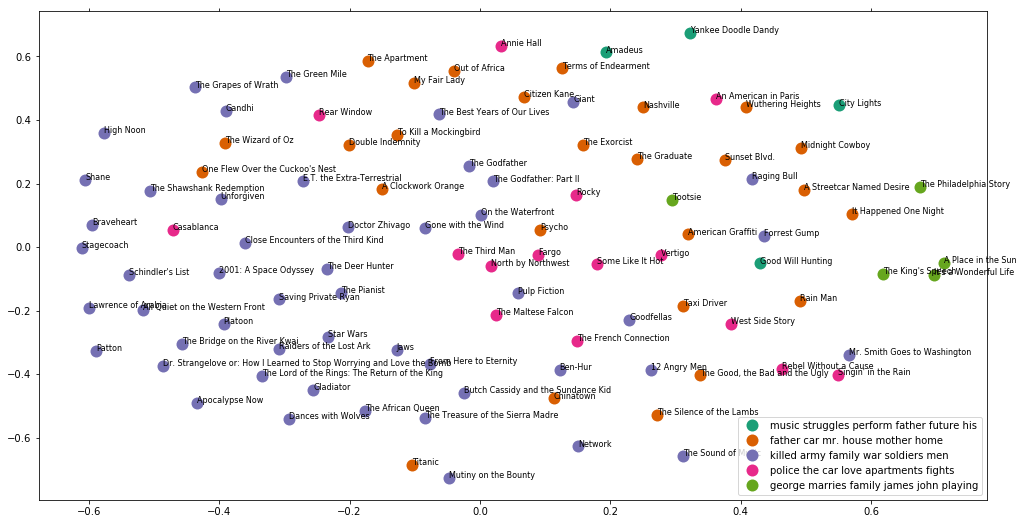

In [107]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

In [ ]:
plt.close()

## Hierarchical document clustering

Let's try another clustering algorithm for example the Ward clustering algorithm because it offers hierarchical clustering. Ward clustering is an agglomerative clustering method, meaning that at each stage, the pair of clusters with minimum between-cluster distance are merged. I used the precomputed cosine distance matrix (dist) to calclate a linkage_matrix, which I then plot as a dendrogram.

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [ ]:
plt.close()

# Word Embedding

As we know the machine learning models cannot process text so we need to figure out a way to convert these textual data into numerical data. Previously techniques like Bag of Words and TF-IDF have been discussed that can help achieve use this task.  	  Apart from this, we can use two more techniques such as one-hot encoding, or we can use unique numbers to represent words in a vocabulary. 

## Text Vectorization

The deep-learning sequence-processing models introduced in
the following sections can use text to produce a basic form of natural-language understanding,
sufficient for applications including document classification, sentiment
analysis, author identification, and even question-answering (QA) (in a constrained
context). Of course, keep in mind throughout this chapter that none of these deeplearning
models truly understand text in a human sense; rather, these models can
map the statistical structure of written language, which is sufficient to solve many simple
textual tasks. Deep learning for natural-language processing is pattern recognition
applied to words, sentences, and paragraphs, in much the same way that computer
vision is pattern recognition applied to pixels.
Like all other neural networks, deep-learning models don’t take as input raw text:
they only work with numeric tensors. Vectorizing text is the process of transforming text
into numeric tensors.

All text-vectorization processes consist of applying some tokenization scheme and then associating numeric vectors with the generated tokens. These vectors, packed into sequence tensors, are fed into deep neural networks. There are multiple ways to
associate a vector with a token. In this section, we’ll present two major ones: one-hot encoding of tokens, and token embedding (typically used exclusively for words, and called word embedding). 

One-hot encoding is the most common, most basic way to turn a token into a vector. It consists of associating a unique integer index with every word
and then turning this integer index i into a binary vector of size N

Another popular and powerful way to associate a vector with a word is the use of dense
word vectors, also called word embeddings. Whereas the vectors obtained through one-hot
encoding are binary, sparse (mostly made of zeros), and very high-dimensional (same
dimensionality as the number of words in the vocabulary), word embeddings are lowdimensional
floating-point vectors (that is, dense vectors, as opposed to sparse vectors);

Unlike the word vectors obtained via one-hot encoding, word
embeddings are learned from data. It’s common to see word embeddings that are
256-dimensional, 512-dimensional, or 1,024-dimensional when dealing with very large
vocabularies. On the other hand, one-hot encoding words generally leads to vectors
that are 20,000-dimensional or greater (capturing a vocabulary of 20,000 tokens, in
this case). So, word embeddings pack more information into far fewer dimensions.

## What is Word Embeddings?

It is easy for humans to understand the relationship between words but for computers, this task may not be simple. For example, we humans understand the words like king and queen, man and woman, tiger and tigress have a certain type of relation between them but how can a computer figure this out? 		  

Word embeddings are basically a form of word representation that bridges the human understanding of language to that of a machine. They are representations of text in an n-dimensional space where words that have the same meaning have a similar representation. Meaning that two similar words are represented by almost similar vectors that are very closely placed in a vector space. These are essential for solving most Natural language processing problems. 

To get a bit more abstract, the geometric relationships between word vectors
should reflect the semantic relationships between these words. Word embeddings are
meant to map human language into a geometric space. For instance, in a reasonable
embedding space, you would expect synonyms to be embedded into similar word vectors;
and in general, you would expect the geometric distance (such as L2 distance)
between any two word vectors to relate to the semantic distance between the associated
words (words meaning different things are embedded at points far away from
each other, whereas related words are closer). In addition to distance, you may want
specific directions in the embedding space to be meaningful. To make this clearer, let’s
look at a concrete example.

four words are embedded on a 2D plane:
cat, dog, wolf, and tiger. With the vector representations we
chose here, some semantic relationships between these
words can be encoded as geometric transformations. For
instance, the same vector allows us to go from cat to tiger
and from dog to wolf : this vector could be interpreted as the
“from pet to wild animal” vector. Similarly, another vector
lets us go from dog to cat and from wolf to tiger, which could
be interpreted as a “from canine to feline” vector.
In real-world word-embedding spaces, common examples
of meaningful geometric transformations are “gender”
vectors and “plural” vectors. For instance, by adding a “female” vector to the vector
“king,” we obtain the vector “queen.” By adding a “plural” vector, we obtain “kings.”
Word-embedding spaces typically feature thousands of such interpretable and potentially
useful vectors.

## The General Idea

First, we convert each word into a one-hot encoding form. Also, we'll not
consider all the words in the sentence but ll only take certain words that
are in a window.

![image.png](./img/word-embedding-1.png)

For example for a window size equal to three, we only consider three words
in a sentence. The middle word is to be predicted and the surrounding two
words are fed into the neural network as context. The window is then slid
and the process is repeated again. Finally, after training the network repeatedly by sliding the window a
shown above, we get weights which we use to get the embeddings as
shown below. Usually, we take a window size of around 8-10 words and have a
vector size of 300.

<!--
<img src=".\img\word-embedding-2.PNG" alt="Drawing" style="width: 600px;"/>
-->

![image.png](./img/word-embedding-2.png)

# References and Credits

**François Chollet**, "Deep Learning with Python", Manning Publication, USA (2019)

**Brandon Rose**, [Document Clustering with Python](Document Clustering with Python)